# LD Statistics Comparison: GPU vs CPU Implementation

This notebook compares LD statistics computed using GPU acceleration vs standard CPU implementation to verify correspondence and identify any discrepancies.

## Objectives:
1. Load LD statistics from both GPU and CPU implementations
2. Calculate Mean Squared Error (MSE) between corresponding statistics
3. Analyze differences by recombination bins
4. Generate comprehensive diagnostic plots
5. Assess overall correspondence between implementations

In [4]:
gpu_stats

{'bins': [(np.float64(0.0), np.float64(1e-06)),
  (np.float64(1e-06), np.float64(2e-06)),
  (np.float64(2e-06), np.float64(5e-06)),
  (np.float64(5e-06), np.float64(1e-05)),
  (np.float64(1e-05), np.float64(2e-05)),
  (np.float64(2e-05), np.float64(5e-05)),
  (np.float64(5e-05), np.float64(0.0001)),
  (np.float64(0.0001), np.float64(0.0002)),
  (np.float64(0.0002), np.float64(0.0005)),
  (np.float64(0.0005), np.float64(0.001))],
 'sums': [array([ 0.00183847,  0.00034669,  0.00024746,  0.00297587,  0.00212914,
          0.00280166,  0.00153211, -0.00030119, -0.0004696 ,  0.0016296 ,
          0.00150423,  0.00200194,  0.00383825,  0.00018846,  0.00043311,
          0.0027871 ,  0.00216119,  0.00567953,  0.00331369,  0.00030414,
          0.00050264,  0.00295086,  0.00120249,  0.0029213 ,  0.00349242,
          0.00723494,  0.00740634,  0.00397859,  0.00425026,  0.00331518,
          0.02371572,  0.02339009,  0.0116443 ,  0.01262047,  0.00962   ,
          0.02361178,  0.01151246,  0.012

CPU has 11 sum arrays, 2 stat groups
GPU has 11 sum arrays, 2 stat groups
CPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
GPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
Found 51 matching statistics
First few matches: ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']
Found 11 arrays with matching shapes for comparison
Creating 8 comparison plots for - Single Window

Array 0 ((45,)):
  MSE: 2.14e+03
  MAE: 3.25e+01
  Max abs diff: 1.33e+02
  Correlation: 0.995118

Array 1 ((45,)):
  MSE: 2.03e+03
  MAE: 3.04e+01
  Max abs diff: 1.31e+02
  Correlation: 0.994637

Array 2 ((45,)):
  MSE: 1.83e+04
  MAE: 8.95e+01
  Max abs diff: 3.94e+02
  Correlation: 0.997151

Array 3 ((45,)):
  MSE: 4.75e+04
  MAE: 1.41e+02
  Max abs diff: 6.27e+02
  Correlation: 0.996595

Array 4 ((45,)):
  MSE: 1.85e+05
  MAE: 2.74e+02
  Max abs diff: 1.25e+03
  Correlation: 0.998077

Array 5 ((45,)):
  MSE: 1.50e+06
  MAE: 7.47e+02
  Max abs diff: 3.55e+03
  Corre

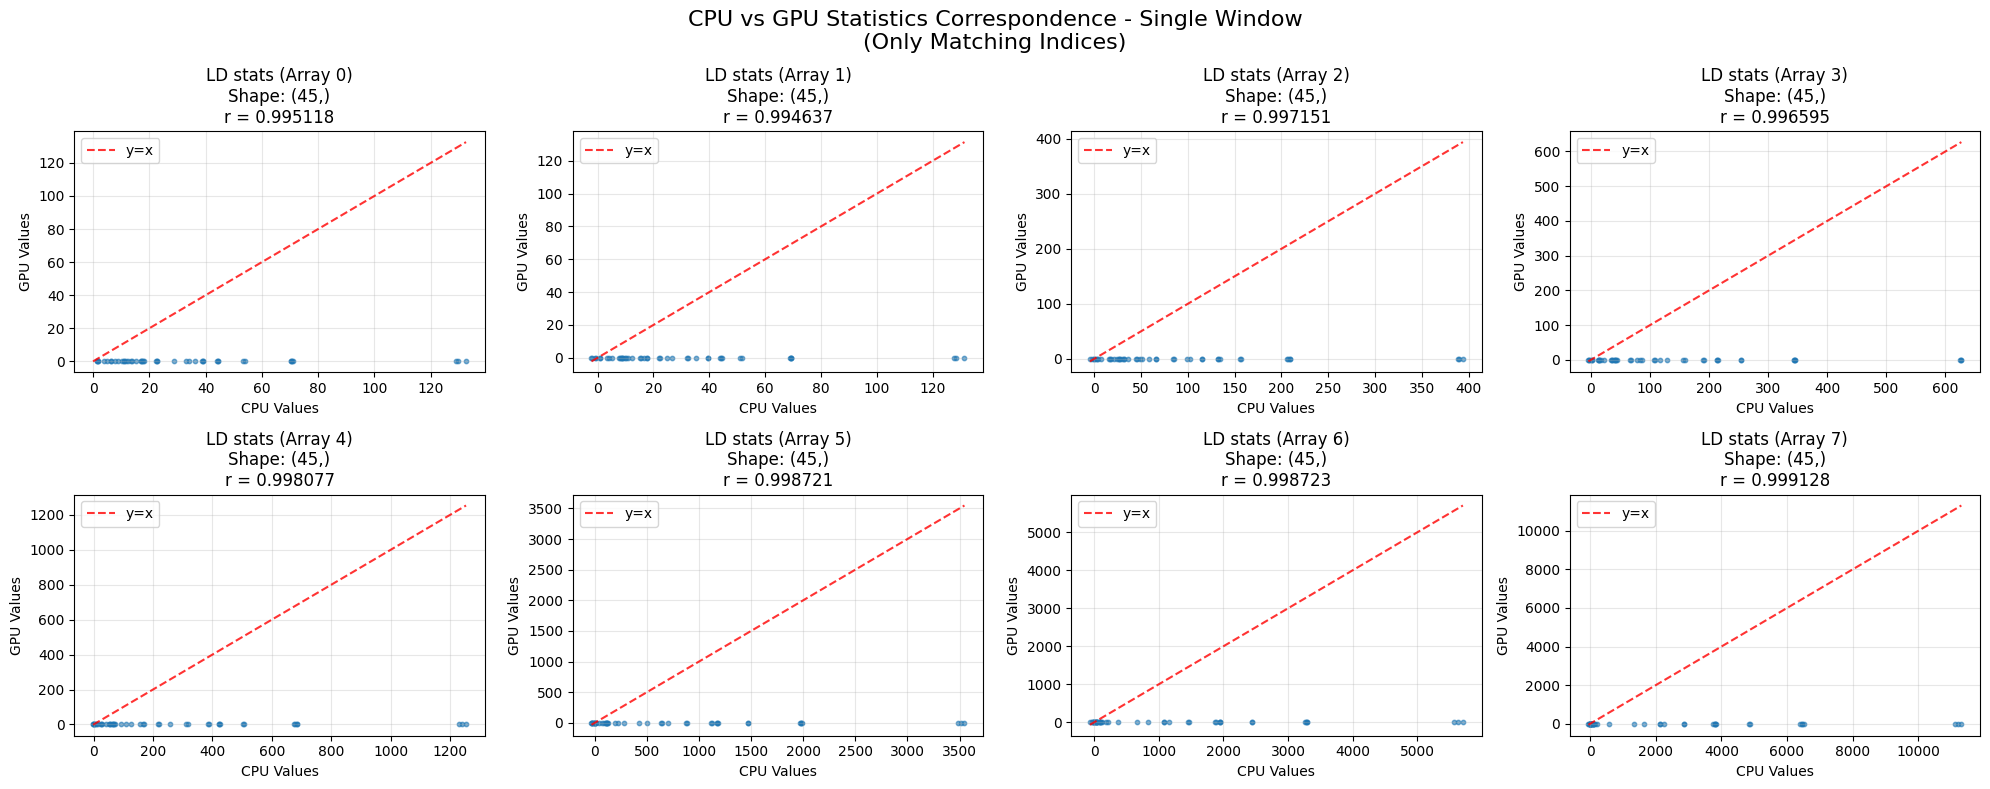


=== SINGLE WINDOW SUMMARY (MATCHING INDICES ONLY) ===
Overall correlation: -0.00390257
Overall MSE: 4.92e+07
Overall MAE: 2.22e+03
Total data points: 456
=== LOADING AND COMPARING 10 WINDOWS (MATCHING INDICES ONLY) ===
Window 0: correlation = 0.999976, 153 data points
Window 1: correlation = 0.999967, 153 data points
Window 2: correlation = 0.999961, 153 data points
Window 3: correlation = 0.999929, 153 data points
Window 4: correlation = 0.999942, 153 data points
Window 5: correlation = 0.999962, 153 data points
Window 6: correlation = 0.999955, 153 data points
Window 7: correlation = 0.999953, 153 data points
Window 8: correlation = 0.999965, 153 data points
Window 9: correlation = 0.999962, 153 data points

=== MULTI-WINDOW SUMMARY (MATCHING INDICES) ===
Windows loaded: 10
Overall correlation: 0.99995334
Mean correlation: 0.99995721
Min correlation: 0.99992934
Max correlation: 0.99997605
Overall MSE: 1.11e+03
Overall MAE: 1.50e+01
Total data points: 1530


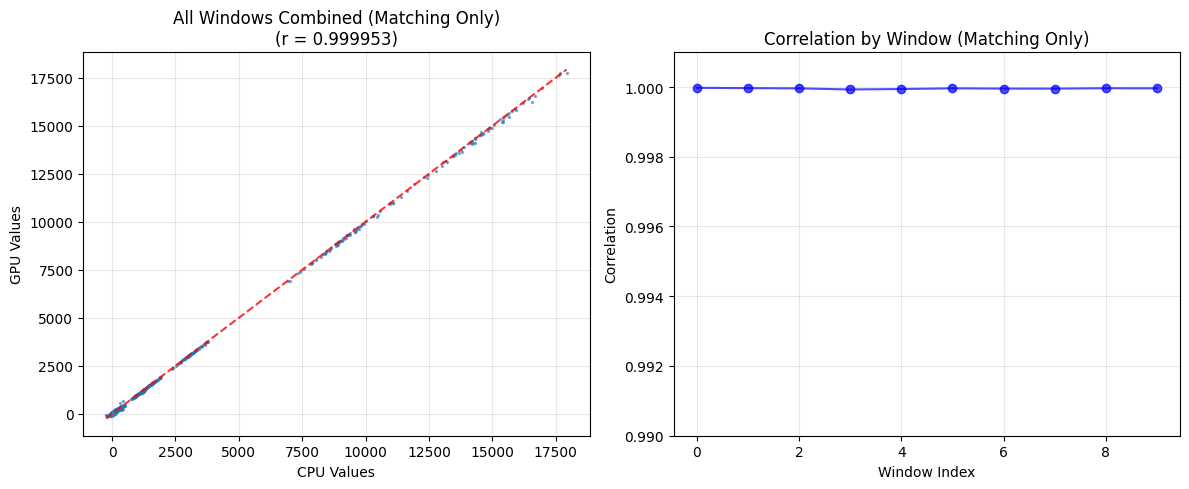

In [6]:
# Create scatter plots to compare CPU vs GPU statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def plot_cpu_vs_gpu_correspondence(cpu_data, gpu_data, title_suffix=""):
    """Plot CPU vs GPU statistics to assess correspondence, only comparing matching statistics."""
    
    # Extract statistics arrays and names from both datasets
    cpu_sums = cpu_data['sums']
    gpu_sums = gpu_data['sums']
    cpu_stats = cpu_data.get('stats', [])
    gpu_stats = gpu_data.get('stats', [])
    
    print(f"CPU has {len(cpu_sums)} sum arrays, {len(cpu_stats)} stat groups")
    print(f"GPU has {len(gpu_sums)} sum arrays, {len(gpu_stats)} stat groups")
    
    # Check if both datasets have the same statistic names
    if cpu_stats and gpu_stats:
        cpu_stat_names = []
        gpu_stat_names = []
        
        # Flatten the stat names from both datasets
        for group in cpu_stats:
            if isinstance(group, list):
                cpu_stat_names.extend(group)
            else:
                cpu_stat_names.append(group)
                
        for group in gpu_stats:
            if isinstance(group, list):
                gpu_stat_names.extend(group)
            else:
                gpu_stat_names.append(group)
        
        print(f"CPU statistics ({len(cpu_stat_names)}): {cpu_stat_names[:5]}..." if len(cpu_stat_names) > 5 else f"CPU statistics: {cpu_stat_names}")
        print(f"GPU statistics ({len(gpu_stat_names)}): {gpu_stat_names[:5]}..." if len(gpu_stat_names) > 5 else f"GPU statistics: {gpu_stat_names}")
        
        # Find common statistics
        common_stats = []
        for i, stat in enumerate(cpu_stat_names):
            if i < len(gpu_stat_names) and gpu_stat_names[i] == stat:
                common_stats.append((i, stat))
        
        print(f"Found {len(common_stats)} matching statistics")
        if len(common_stats) > 0:
            print(f"First few matches: {[stat for _, stat in common_stats[:5]]}")
    
    # Compare sum arrays that have matching shapes and are within valid range
    valid_comparisons = []
    min_arrays = min(len(cpu_sums), len(gpu_sums))
    
    for i in range(min_arrays):
        cpu_vals = cpu_sums[i]
        gpu_vals = gpu_sums[i]
        
        if cpu_vals.shape == gpu_vals.shape:
            valid_comparisons.append(i)
    
    print(f"Found {len(valid_comparisons)} arrays with matching shapes for comparison")
    
    if len(valid_comparisons) == 0:
        print("❌ No matching arrays found for comparison")
        return
    
    # Create subplots for valid comparisons
    n_plots = min(len(valid_comparisons), 8)  # Limit to 8 plots for visibility
    n_cols = min(4, n_plots)
    n_rows = int(np.ceil(n_plots / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    print(f"Creating {n_plots} comparison plots for {title_suffix}")
    
    for plot_idx in range(n_plots):
        array_idx = valid_comparisons[plot_idx]
        ax = axes[plot_idx] if n_plots > 1 else axes
        
        cpu_vals = cpu_sums[array_idx]
        gpu_vals = gpu_sums[array_idx]
        
        # Flatten arrays for scatter plot
        cpu_flat = cpu_vals.flatten()
        gpu_flat = gpu_vals.flatten()
        
        # Create scatter plot
        ax.scatter(cpu_flat, gpu_flat, alpha=0.6, s=10)
        
        # Add perfect correspondence line
        min_val = min(np.min(cpu_flat), np.min(gpu_flat))
        max_val = max(np.max(cpu_flat), np.max(gpu_flat))
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='y=x')
        
        # Calculate correlation
        if len(cpu_flat) > 1:
            try:
                corr, p_val = pearsonr(cpu_flat, gpu_flat)
                
                # Add array type info
                array_type = "LD stats" if cpu_vals.shape[0] > 10 else "H stats" if cpu_vals.shape[0] == 6 else f"Array {array_idx}"
                ax.set_title(f'{array_type} (Array {array_idx})\nShape: {cpu_vals.shape}\nr = {corr:.6f}')
            except:
                ax.set_title(f'Array {array_idx}\nShape: {cpu_vals.shape}')
        else:
            ax.set_title(f'Array {array_idx}\nShape: {cpu_vals.shape}')
            
        ax.set_xlabel('CPU Values')
        ax.set_ylabel('GPU Values')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Print summary statistics
        mse = np.mean((cpu_flat - gpu_flat)**2)
        mae = np.mean(np.abs(cpu_flat - gpu_flat))
        max_diff = np.max(np.abs(cpu_flat - gpu_flat))
        
        print(f"\nArray {array_idx} ({cpu_vals.shape}):")
        print(f"  MSE: {mse:.2e}")
        print(f"  MAE: {mae:.2e}")
        print(f"  Max abs diff: {max_diff:.2e}")
        if len(cpu_flat) > 1:
            print(f"  Correlation: {corr:.6f}")
    
    # Remove empty subplots
    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle(f'CPU vs GPU Statistics Correspondence {title_suffix}\n(Only Matching Indices)', fontsize=16)
    plt.tight_layout()
    plt.show()

def load_and_compare_multiple_windows(n_windows=5):
    """Load and compare statistics from multiple windows, only using matching indices."""
    
    print(f"=== LOADING AND COMPARING {n_windows} WINDOWS (MATCHING INDICES ONLY) ===")
    
    all_cpu_vals = []
    all_gpu_vals = []
    all_correlations = []
    window_indices = []
    
    # Load multiple windows
    for i in range(min(n_windows, 100)):  # Limit to available windows
        try:
            # Load CPU data
            cpu_file = f"{base_dir}/experiments/split_isolation/inferences/sim_0/MomentsLD/traditional/LD_stats/LD_stats_window_{i}.pkl"
            gpu_file = f"{base_dir}/experiments/split_isolation/inferences/sim_0/MomentsLD/LD_stats/LD_stats_window_{i}.pkl"
            
            if os.path.exists(cpu_file) and os.path.exists(gpu_file):
                with open(cpu_file, 'rb') as f:
                    cpu_data = pickle.load(f)
                with open(gpu_file, 'rb') as f:
                    gpu_data = pickle.load(f)
                
                # Extract statistics only from matching indices
                window_cpu = []
                window_gpu = []
                
                min_arrays = min(len(cpu_data['sums']), len(gpu_data['sums']))
                for j in range(min_arrays):
                    if cpu_data['sums'][j].shape == gpu_data['sums'][j].shape:
                        window_cpu.extend(cpu_data['sums'][j].flatten())
                        window_gpu.extend(gpu_data['sums'][j].flatten())
                
                if window_cpu and window_gpu:
                    all_cpu_vals.extend(window_cpu)
                    all_gpu_vals.extend(window_gpu)
                    
                    # Calculate correlation for this window
                    window_cpu = np.array(window_cpu)
                    window_gpu = np.array(window_gpu)
                    corr, _ = pearsonr(window_cpu, window_gpu)
                    all_correlations.append(corr)
                    window_indices.append(i)
                    
                    print(f"Window {i}: correlation = {corr:.6f}, {len(window_cpu)} data points")
        except Exception as e:
            print(f"Error loading window {i}: {e}")
    
    # Overall statistics
    if all_cpu_vals:
        all_cpu_vals = np.array(all_cpu_vals)
        all_gpu_vals = np.array(all_gpu_vals)
        
        overall_corr, _ = pearsonr(all_cpu_vals, all_gpu_vals)
        overall_mse = np.mean((all_cpu_vals - all_gpu_vals)**2)
        overall_mae = np.mean(np.abs(all_cpu_vals - all_gpu_vals))
        
        print(f"\n=== MULTI-WINDOW SUMMARY (MATCHING INDICES) ===")
        print(f"Windows loaded: {len(window_indices)}")
        print(f"Overall correlation: {overall_corr:.8f}")
        print(f"Mean correlation: {np.mean(all_correlations):.8f}")
        print(f"Min correlation: {np.min(all_correlations):.8f}")
        print(f"Max correlation: {np.max(all_correlations):.8f}")
        print(f"Overall MSE: {overall_mse:.2e}")
        print(f"Overall MAE: {overall_mae:.2e}")
        print(f"Total data points: {len(all_cpu_vals)}")
        
        # Create overall scatter plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Scatter plot (sample for performance)
        sample_size = min(10000, len(all_cpu_vals))
        indices = np.random.choice(len(all_cpu_vals), sample_size, replace=False)
        sample_cpu = all_cpu_vals[indices]
        sample_gpu = all_gpu_vals[indices]
        
        axes[0].scatter(sample_cpu, sample_gpu, alpha=0.5, s=2)
        min_val = min(np.min(sample_cpu), np.min(sample_gpu))
        max_val = max(np.max(sample_cpu), np.max(sample_gpu))
        axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        axes[0].set_xlabel('CPU Values')
        axes[0].set_ylabel('GPU Values')
        axes[0].set_title(f'All Windows Combined (Matching Only)\n(r = {overall_corr:.6f})')
        axes[0].grid(True, alpha=0.3)
        
        # Correlation per window
        axes[1].plot(window_indices, all_correlations, 'bo-', alpha=0.7)
        axes[1].set_xlabel('Window Index')
        axes[1].set_ylabel('Correlation')
        axes[1].set_title('Correlation by Window (Matching Only)')
        axes[1].grid(True, alpha=0.3)
        axes[1].set_ylim([0.99, 1.001])
        
        plt.tight_layout()
        plt.show()
        
        return overall_corr, overall_mse, all_correlations
    else:
        print("No data loaded for comparison")
        return None, None, []

# First plot the single window we loaded with matching indices only
plot_cpu_vs_gpu_correspondence(cpu_stats, gpu_stats, "- Single Window")

# Calculate overall statistics across matching arrays only for single window
print(f"\n=== SINGLE WINDOW SUMMARY (MATCHING INDICES ONLY) ===")
all_cpu_vals = []
all_gpu_vals = []

min_arrays = min(len(cpu_stats['sums']), len(gpu_stats['sums']))
for i in range(min_arrays):
    if cpu_stats['sums'][i].shape == gpu_stats['sums'][i].shape:
        all_cpu_vals.extend(cpu_stats['sums'][i].flatten())
        all_gpu_vals.extend(gpu_stats['sums'][i].flatten())

if all_cpu_vals:
    all_cpu_vals = np.array(all_cpu_vals)
    all_gpu_vals = np.array(all_gpu_vals)
    
    overall_corr, _ = pearsonr(all_cpu_vals, all_gpu_vals)
    overall_mse = np.mean((all_cpu_vals - all_gpu_vals)**2)
    overall_mae = np.mean(np.abs(all_cpu_vals - all_gpu_vals))
    
    print(f"Overall correlation: {overall_corr:.8f}")
    print(f"Overall MSE: {overall_mse:.2e}")
    print(f"Overall MAE: {overall_mae:.2e}")
    print(f"Total data points: {len(all_cpu_vals)}")

# Now load and compare multiple windows with matching indices only
corr, mse, window_corrs = load_and_compare_multiple_windows(10)